<a href="https://colab.research.google.com/github/shruti629/Deep-Health-Analysis-and-Disease-Prediction/blob/main/Kidney_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kidney Disease Prediction**

This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.

Representation of dataset

           age		-	age
			bp		-	blood pressure
			sg		-	specific gravity
			al		-    albumin
			su		-	sugar
			rbc		-  red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet		-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class		-	class



Additional Variable Information

We use 24 + class = 25 ( 11  numeric ,14  nominal)

1.Age(numerical)
  	  	age in years

2.Blood Pressure(numerical)
	       	bp in mm/Hg

3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)

4.Albumin(nominal)
		al - (0,1,2,3,4,5)

5.Sugar(nominal)
		su - (0,1,2,3,4,5)

6.Red Blood Cells(nominal)
		rbc - (normal,abnormal)

7.Pus Cell (nominal)
		pc - (normal,abnormal)

8.Pus Cell clumps(nominal)
		pcc - (present,notpresent)

9.Bacteria(nominal)
		ba  - (present,notpresent)

10.Blood Glucose Random(numerical)
		bgr in mgs/dl

11.Blood Urea(numerical)
		bu in mgs/dl

12.Serum Creatinine(numerical)
		sc in mgs/dl

13.Sodium(numerical)
		sod in mEq/L

14.Potassium(numerical)
		pot in mEq/L

15.Hemoglobin(numerical)
		hemo in gms

16.Packed  Cell Volume(numerical)

17.White Blood Cell Count(numerical)
		wc in cells/cumm

18.Red Blood Cell Count(numerical)
		rc in millions/cmm

19.Hypertension(nominal)
		htn - (yes,no)

20.Diabetes Mellitus(nominal)
		dm - (yes,no)

21.Coronary Artery Disease(nominal)
		cad - (yes,no)

22.Appetite(nominal)
		appet - (good,poor)

23.Pedal Edema(nominal)
		pe - (yes,no)

24.Anemia(nominal)
		ane - (yes,no)
    
25.Class (nominal)
		class - (ckd,notckd)



In [ ]:
#Import the Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Import Datasets
kd=pd.read_csv("/content/drive/MyDrive/kidney_disease.csv")
kd.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
kd.describe()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,sod,pot,hemo,htn,dm,cad,appet,pe,ane,classification
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,400.000000,400.000000,400.000000,400.000000,...,313.000000,312.000000,348.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,1.262500,0.972500,0.125000,0.075000,...,137.528754,4.627244,12.526437,0.377500,3.310000,1.090000,0.210000,0.195000,0.15500,0.755000
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,0.655491,0.593823,0.360138,0.299331,...,10.408752,3.193904,2.912587,0.495588,0.591417,0.319618,0.413918,0.402965,0.36921,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,135.000000,3.800000,10.300000,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,138.000000,4.400000,12.650000,0.000000,3.000000,1.000000,0.000000,0.000000,0.00000,0.000000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,142.000000,4.900000,15.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.00000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,...,163.000000,47.000000,17.800000,2.000000,5.000000,3.000000,2.000000,2.000000,2.00000,2.000000


In [ ]:
kd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
kd.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
kd.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc                 0
pc                  0
pcc                 0
ba                  0
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 0
dm                  0
cad                 0
appet               0
pe                  0
ane                 0
classification      0
dtype: int64

In [ ]:
le = LabelEncoder()

In [ ]:
kd['classification'] = le.fit_transform(kd['classification'])
kd['ane'] = le.fit_transform(kd['ane'])
kd['pc'] = le.fit_transform(kd['pc'])
kd['pe'] = le.fit_transform(kd['pe'])
kd['appet'] = le.fit_transform(kd['appet'])
kd['htn'] = le.fit_transform(kd['htn'])
kd['dm'] = le.fit_transform(kd['dm'])
kd['cad'] = le.fit_transform(kd['cad'])
kd['pcc'] = le.fit_transform(kd['pcc'])
kd['ba'] = le.fit_transform(kd['ba'])
kd['rbc'] = le.fit_transform(kd['rbc'])

In [ ]:
kd

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,2,1,0,0,...,44,7800,5.2,1,4,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,2,1,0,0,...,38,6000,NaN,0,3,1,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31,7500,NaN,0,4,1,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32,6700,3.9,1,3,1,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35,7300,4.6,0,3,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,47,6700,4.9,0,3,1,0,0,0,2
396,396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,54,7800,6.2,0,3,1,0,0,0,2
397,397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,49,6600,5.4,0,3,1,0,0,0,2
398,398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,51,7200,5.9,0,3,1,0,0,0,2


In [ ]:
kd.replace('\t?', float('nan'), inplace=True)  # Replace '\t?' with NaN

# Convert the relevant columns to float
columns_to_convert = [ 'bp',     'sg',   'al' ,  'su',  'rbc',  'pc',  'pcc' , 'ba'  ,'bgr', 'bu', 'sc', 'sod', 'pot' ,'hemo' ,'pcv' , 'wc' , 'rc' ,'htn',  'dm'  ,'cad',  'appet' , 'pe' , 'ane' , 'classification']  # Replace with the actual column names
for column in columns_to_convert:
    kd[column] = pd.to_numeric(kd[column], errors='coerce')

# Drop rows with missing values
kd.dropna(inplace=True)

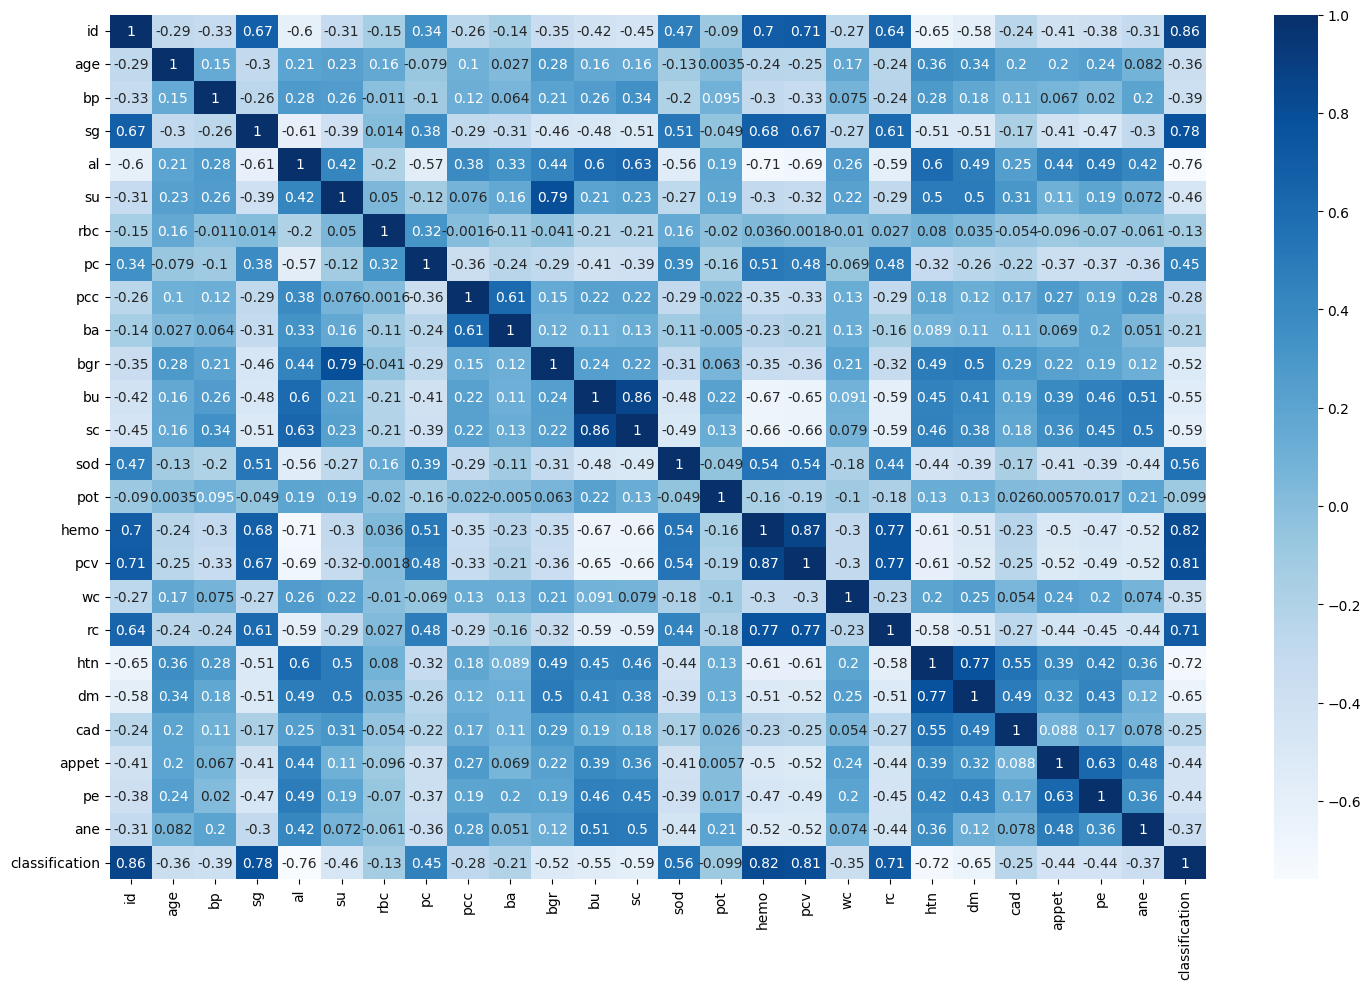

In [ ]:
plt.figure(figsize=(15, 10))
corr=kd.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.tight_layout()

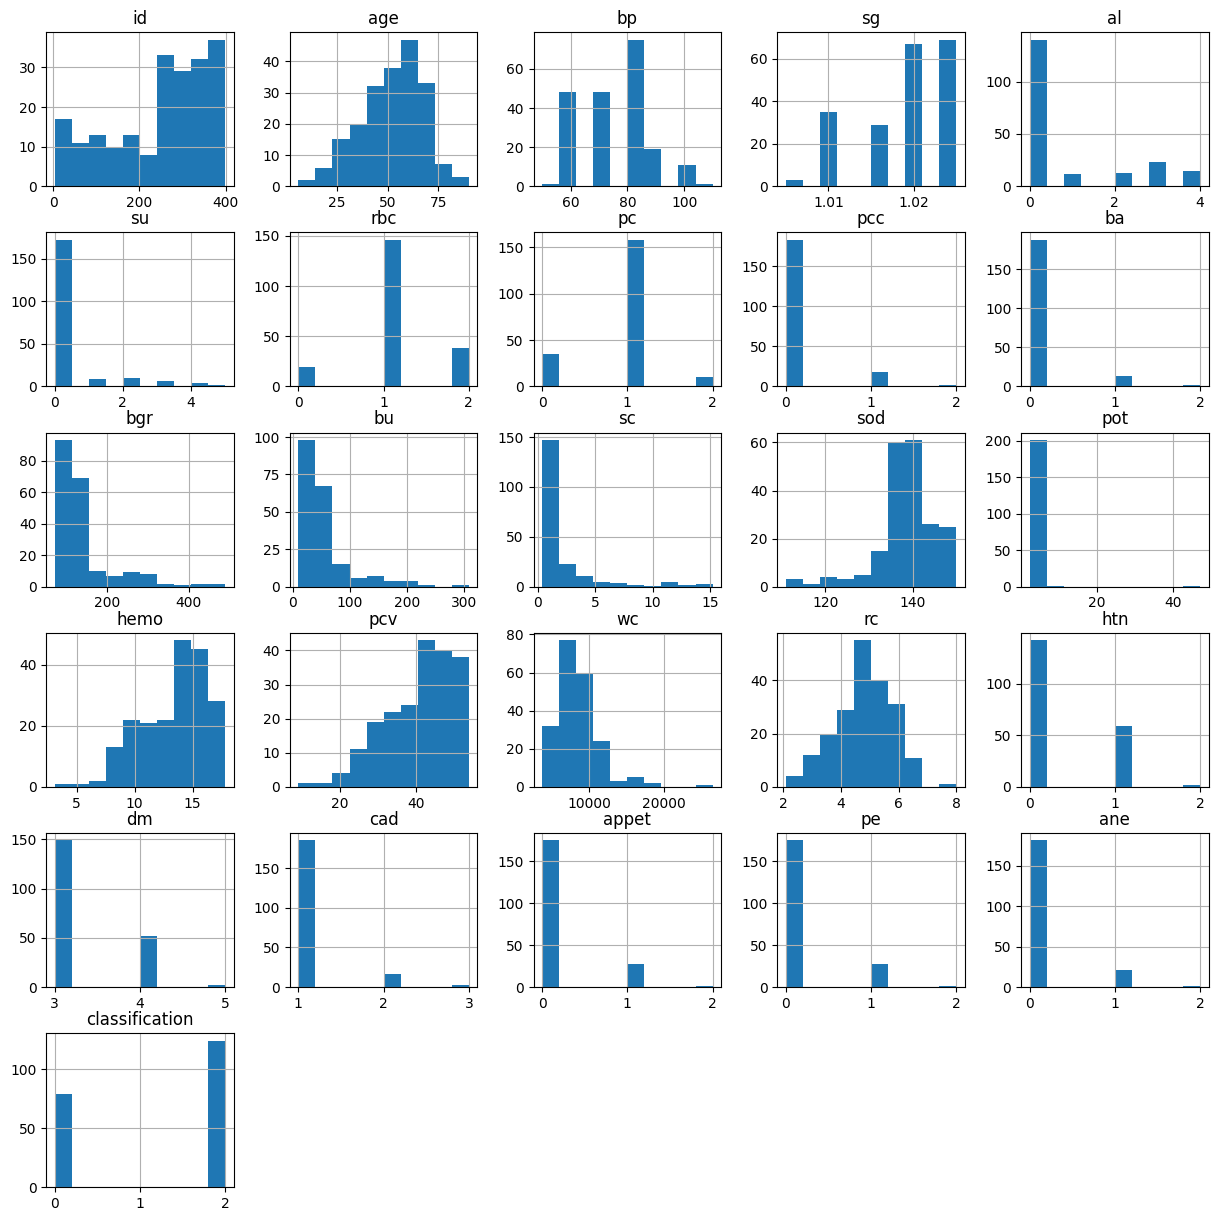

In [ ]:
kd.hist(bins=10,figsize=(15,15))
plt.show()

In [ ]:
#datasets divide into independent and dependent features
X=kd.drop(columns=['classification','id'])
Y=kd['classification']

In [ ]:
#split data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=0,test_size=0.20)

In [ ]:
reg=LogisticRegression(max_iter=20)
reg.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=20)

In [ ]:
Y_pred = reg.predict(X_train)

In [ ]:
# Fix: predict on the test data
Y_pred = reg.predict(X_test)

Confusion Matrix, Accuracy Score,Classification Report

In [ ]:
clf=confusion_matrix(Y_test,Y_pred)
clf

array([[17,  1],
       [ 0, 23]])

In [ ]:
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.975609756097561

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           2       0.96      1.00      0.98        23

    accuracy                           0.98        41
   macro avg       0.98      0.97      0.98        41
weighted avg       0.98      0.98      0.98        41



Pickle the Model for deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(reg,open('reg.pkl','wb'))